<a href="https://colab.research.google.com/github/TheBoatyMcBoatFace/MLness/blob/main/MultiVariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Learing - Machine Learning

Objective of this example is to Predict the Price of House (dependent variable) based on Size of the house and number of Bedrooms in the house (independent variables).

Another example - If we want to predict the shadow of a plant (dependent variable) on other factors such as sun (source of light) and height of plant (both being independent variables) it can be achieved using Multivariate linear regression method

Introduction to Multivariate Linear Regression


https://www.youtube.com/watch?v=dQNpSa-bq4M

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Feature Normalization ->
Substracting the mean from each data entry and dividing it by standard deviation (Statistical method)

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


X = # of columns in the table, Features (Inputs),
y = Target variable

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Compute Gradient Descent

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

Declare alpha (Learning rate), iters (# of Epochs) for computing gradient Descent and Cost/Loss Function

In [ ]:
alpha = 0.01
iters = 1000

adding a column of ones to the training set so a vectorized solution can be used to computing the cost and gradients.



In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

Setting Training and Target variables and computing Gradient Descent

In [ ]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

Computing Cost/Loss Function

In [ ]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

In [ ]:
X2.shape, theta2.shape, y2.shape

((47, 3), (1, 3), (47, 1))

Plotting Error vs Training Epoch Graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

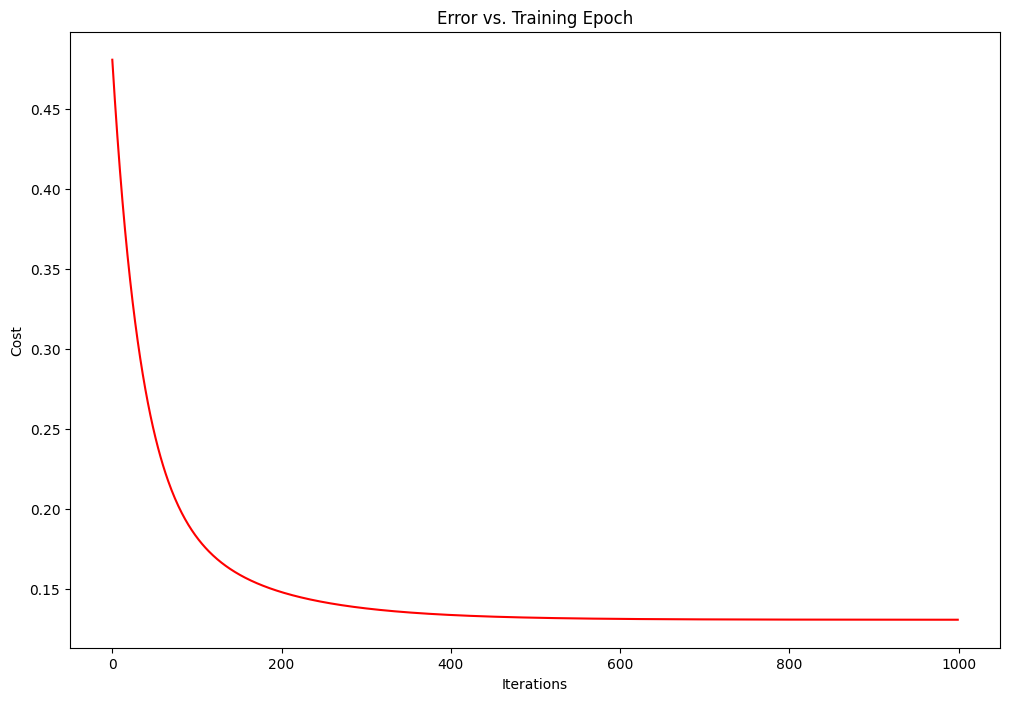

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Fitting / Building the ML Linear Regression Model

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(np.asarray(X2), np.asarray(y2))

LinearRegression()

Drawing/Plotting the Graph and making prediction

In [ ]:
x = np.array(X2[:, 1].A1)
f = model.predict(np.asarray(X2)).flatten()

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Bedrooms, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_zlabel('Size')
ax.set_title('# of Bedrooms, Size of House vs. Predicted Price')


Reference - https://github.com/jdwittenauer/ipython-notebooks

Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = 0.7329450180289143)')

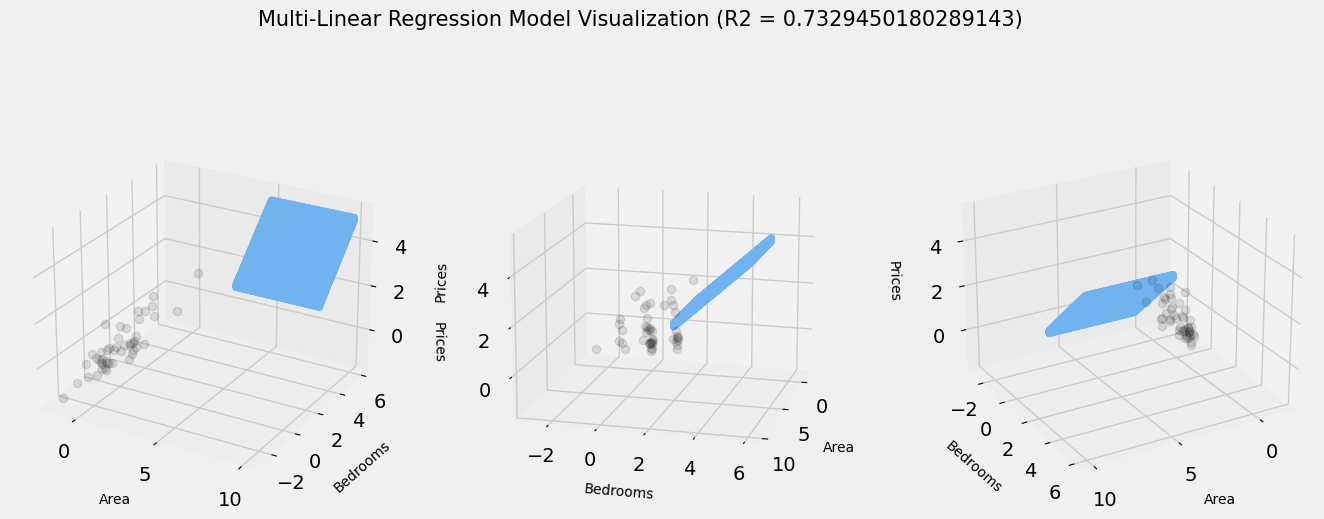

In [ ]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model

# Preparing the data
independent = data2[['Size', 'Bedrooms']].values.reshape(-1,2)
dependent = data2['Price']

# Creating a variable for each dimension
x = independent[:, 0]
y = independent[:, 1]
z = dependent

x_range = np.linspace(5, 10, 35)
y_range = np.linspace(3, 6, 35)
x1_range = np.linspace(3, 6, 35)
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T

# Predicting price values using the linear regression model built above
predictions = model.predict(viz)

# Evaluating the model using the R2 square of the model
r2 = model.score(np.asarray(X2), np.asarray(y2))

# Ploting the model for visualization
plt.style.use('fivethirtyeight')

# Initializing a matplotlib figure
fig = plt.figure(figsize = (15, 6))

axis1 = fig.add_subplot(131, projection = '3d')
axis2 = fig.add_subplot(132, projection = '3d')
axis3 = fig.add_subplot(133, projection = '3d')

axes = [axis1, axis2, axis3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')
    ax.set_xlabel('Area', fontsize = 10, labelpad = 10)
    ax.set_ylabel('Bedrooms', fontsize = 10, labelpad = 10)
    ax.set_zlabel('Prices', fontsize = 10, labelpad = 10)
    ax.locator_params(nbins = 3, axis = 'x')
    ax.locator_params(nbins = 3, axis = 'x')

axis1.view_init(elev=25, azim=-60)
axis2.view_init(elev=15, azim=15)
axis3.view_init(elev=25, azim=60)

fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')

Reference - https://www.javatpoint.com/how-to-plot-multiple-linear-regression-in-python